# Dataset: Carbon dioxide

## The Keeling Curve

The [Keeling Curve](https://en.wikipedia.org/wiki/Keeling_Curve) is a graph of the accumulation of carbon dioxide in the Earth's atmosphere based on continuous measurements taken at the Mauna Loa Observatory on the island of Hawaii. The curve is named for the scientist Charles David Keeling, who started the monitoring program and supervised it until his death in 2005. Keeling published the first "Keeling Curve" of monthly carbon dioxide records from Mauna Loa from 1958 to 1960 in the journal Tellus in 1960, and reported that the year-to-year increase in carbon dioxide roughly matched the amount of fossil fuels burned per year. By 1976, it was well established that the rising carbon dioxide in the curve was due to anthropogenic emissions. 

The carbon dioxide data from Mauna Loa are freely available to [download](http://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record) from the Scripps Institution of Oceanography, so we are going to go ahead and recreate the curve.

In [153]:
!head -n 60 monthly_in_situ_co2_mlo.csv

"-------------------------------------------------------------------------------------------"
" Atmospheric CO2 concentrations (ppm) derived from in situ air measurements                "
" at Mauna Loa, Observatory, Hawaii: Latitude 19.5°N Longitude 155.6°W Elevation 3397m      "
"                                                                                           "
" Source: R. F. Keeling, S. J. Walker, S. C. Piper and A. F. Bollenbacher                   "
" Scripps CO2 Program ( http://scrippsco2.ucsd.edu )                                        "
" Scripps Institution of Oceanography (SIO)                                                 "
" University of California                                                                  "
" La Jolla, California USA 92093-0244                                                       "
"                                                                                           "
" Status of data and correspondence:                        

### Read and clean data

*It may be preferable to edit the input file so that this complicated clean-up isn't the first thing that novice learners need to do.*

In [160]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [156]:
def read_scripps_data(infile):
    """Read and clean CO2 data from Scripps"""
    
    df = pd.read_csv(infile, skiprows=54)

    # Select year, month and CO2 columns
    df = df.iloc[2:, [0,1,4]]
    df = df.reset_index(drop=True)

    # Remove whitespace from column names
    df = df.rename(columns=lambda x: x.strip())
    
    # Replace the default index column with datetime objects
    df.rename(columns={'Yr': 'year', 'Mn': 'month'}, inplace=True)
    df['day'] = 15
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    df = df.drop(columns=['year', 'month', 'day'])
    df = df.set_index(['date'])

    # Replace missing values (-99.99) with NaNs
    df = df.astype(float).replace(-99.99, np.nan)
    
    return df

In [157]:
mlo_df = read_scripps_data('monthly_in_situ_co2_mlo.csv')
mlo_df

,CO2
date,
1958-01-15,NaN
1958-02-15,NaN
1958-03-15,315.70
1958-04-15,317.45
1958-05-15,317.51
1958-06-15,NaN
1958-07-15,315.86
1958-08-15,314.93
1958-09-15,313.20


In [158]:
%matplotlib inline

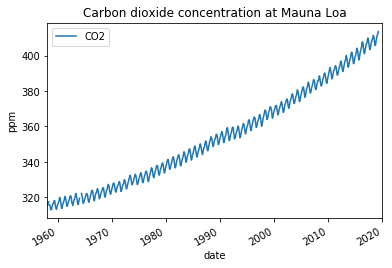

In [163]:
mlo_df.plot()
plt.ylabel('ppm')
plt.title('Carbon dioxide concentration at Mauna Loa')
plt.show()

## Premier Global Baseline Stations

Mauna Loa isn't the only place where carbon dioxide is measured. The [Global Atmosphere Watch](http://www.wmo.int/pages/prog/arep/gaw/gaw_home_en.html) programme of the World Meteorological Organization has global baseline stations distributed around the globe. The three premier global baseline stations are:

* [Mauna Loa, Hawaii, USA](http://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record)
* [Cape Grim, Tasmania, Australia](https://www.csiro.au/en/Research/OandA/Areas/Assessing-our-climate/Latest-greenhouse-gas-data)
* [Alert, Nunavut, Canada](http://scrippsco2.ucsd.edu/data/atmospheric_co2/alt)

All three are in remote locations to avoid contamination of air samples from nearby emission sources (e.g. factories).

Similar to Mauna Loa, the Alert data is made available by the Scripps Institution for Oceanography.

In [164]:
alt_df = read_scripps_data('monthly_flask_co2_alt.csv')

In [165]:
alt_df

,CO2
date,
1985-01-15,NaN
1985-02-15,NaN
1985-03-15,NaN
1985-04-15,NaN
1985-05-15,352.76
1985-06-15,348.19
1985-07-15,343.36
1985-08-15,NaN
1985-09-15,338.64


The Cape Grim data is provided by CSIRO in Australia and therefore uses a different file format.

In [166]:
!head -n 30 CapeGrim_CO2_data_download.csv

In [173]:
def read_csiro_data(infile):
    """Read and clean CO2 data from CSIRO"""
    
    df = pd.read_csv(infile, skiprows=24)
    
    # Select and rename relevant columns
    df = df.iloc[:, [0,1,2,4]]
    df.rename(columns={'YYYY': 'year', 'MM': 'month', 'DD': 'day', 'CO2(ppm)': 'CO2'}, inplace=True)
    
    # Replace the default index column with datetime objects
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    df = df.drop(columns=['year', 'month', 'day'])
    df = df.set_index(['date'])
    
    return df

In [174]:
cgm_df = read_csiro_data('CapeGrim_CO2_data_download.csv')
cgm_df

,CO2
date,
1976-05-15,328.861
1976-06-15,328.988
1976-07-15,329.653
1976-08-15,330.550
1976-09-15,330.872
1976-10-15,330.899
1976-11-15,330.883
1976-12-15,330.677
1977-01-15,330.529


We can concatenate all three sites into the same pandas data frame and plot them all.

In [191]:
premier_df = pd.concat([mlo_df, alt_df, cgm_df], axis=1)
premier_df.columns = ["Mauna Loa", "Alert", "Cape Grim"]
premier_df

,Mauna Loa,Alert,Cape Grim
date,,,
1958-01-15,NaN,NaN,NaN
1958-02-15,NaN,NaN,NaN
1958-03-15,315.70,NaN,NaN
1958-04-15,317.45,NaN,NaN
1958-05-15,317.51,NaN,NaN
1958-06-15,NaN,NaN,NaN
1958-07-15,315.86,NaN,NaN
1958-08-15,314.93,NaN,NaN
1958-09-15,313.20,NaN,NaN


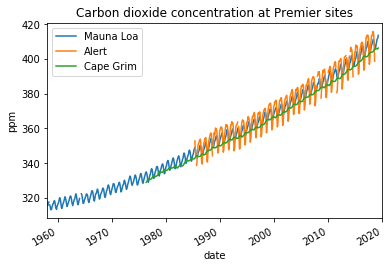

In [192]:
premier_df.plot()
plt.ylabel('ppm')
plt.title('Carbon dioxide concentration at Premier sites')
plt.show()

The reason for the close correspondence between the three sites is that once carbon dioxide is emitted into the atmosphere, it tends to hang around for [a long time](https://www.theguardian.com/environment/2012/jan/16/greenhouse-gases-remain-air). Most of it eventaully dissolves into the ocean, but that typically takes 20–200 years. This means there is plenty of time for the atmosphere to mix it more or less evenly around the global atmosphere.

## Seasonal cycle

The major difference between the data from Mauna Loa, Alert and Cape Grim is the seasonal cycle (i.e. the saw-tooth pattern embedded within the strong increasing trend). This arises due to the fact that there is more vegetation in the Northern Hemisphere. The planet essentially breathes out during boreal autumn and in during boreal spring.